# Forever Red vs Blue:
## League of Legends Main Objects Stats

__By Lotus Baumgarner__



## 1. Data Exploration and Cleaning

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)  # Displays all rows
pd.set_option('display.max_columns', None)  # Displays all columns

In [2]:
# Loaded in Original Data Set and viewed first ten rows
df = pd.read_csv('C:\\Users\\lotus\\Documents\\Personal_Projects\\League_of_Legends\\Data\\training_data.csv')

df.head(10)

,'gameId','b_firstBlood','b_firstTower','b_firstInhibitor','b_firstBaron','b_firstDragon','b_firstRiftHerald','b_towerKills','b_inhibitorKills','b_baronKills','b_dragonKills','b_riftHeraldKills','r_firstBlood','r_firstTower','r_firstInhibitor','r_firstBaron','r_firstDragon','r_firstRiftHerald','r_towerKills','r_inhibitorKills','r_baronKills','r_dragonKills','r_riftHeraldKills','b_summoner1_accountId','b_summoner1_level','b_summoner1_role','b_summoner1_lane','b_summoner1_championLevel','b_summoner1_championPoints','b_summoner1_lastPlayTime','b_summoner1_championPointsSinceLastLevel','b_summoner1_championPointsUntilNextLevel','b_summoner1_chestGranted','b_summoner1_tokensEarned','b_summoner1_totalChampionMastery','b_summoner1_championId','b_summoner1_spell1Id','b_summoner1_spell2Id','b_summoner1_item0','b_summoner1_item1','b_summoner1_item2','b_summoner1_item3','b_summoner1_item4','b_summoner1_item5','b_summoner1_item6','b_summoner1_kills','b_summoner1_deaths','b_summoner1_assists','b_summoner1_largestKillingSpree','b_summoner1_largestMultiKill','b_summoner1_killingSprees','b_summoner1_longestTimeSpentLiving','b_summoner1_doubleKills','b_summoner1_tripleKills','b_summoner1_quadraKills','b_summoner1_pentaKills','b_summoner1_totalDamageDealt','b_summoner1_magicDamageDealt','b_summoner1_physicalDamageDealt','b_summoner1_trueDamageDealt','b_summoner1_largestCriticalStrike','b_summoner1_totalDamageDealtToChampions','b_summoner1_magicDamageDealtToChampions','b_summoner1_physicalDamageDealtToChampions','b_summoner1_trueDamageDealtToChampions','b_summoner1_totalHeal','b_summoner1_totalUnitsHealed','b_summoner1_damageSelfMitigated','b_summoner1_damageDealtToObjectives','b_summoner1_damageDealtToTurrets','b_summoner1_visionScore','b_summoner1_timeCCingOthers','b_summoner1_totalDamageTaken','b_summoner1_magicalDamageTaken','b_summoner1_physicalDamageTaken','b_summoner1_trueDamageTaken','b_summoner1_goldEarned','b_summoner1_goldSpent','b_summoner1_turretKills','b_summoner1_inhibitorKills','b_summoner1_totalMinionsKilled','b_summoner1_neutralMinionsKilled','b_summoner1_neutralMinionsKilledTeamJungle','b_summoner1_neutralMinionsKilledEnemyJungle','b_summoner1_totalTimeCrowdControlDealt','b_summoner1_champLevel','b_summoner1_visionWardsBoughtInGame','b_summoner1_sightWardsBoughtInGame','b_summoner1_wardsPlaced','b_summoner1_wardsKilled','b_summoner1_firstBloodKill','b_summoner1_firstBloodAssist','b_summoner1_firstTowerKill','b_summoner1_firstTowerAssist','b_summoner1_combatPlayerScore','b_summoner1_objectivePlayerScore','b_summoner1_totalPlayerScore','b_summoner1_totalScoreRank','b_summoner2_accountId','b_summoner2_level','b_summoner2_role','b_summoner2_lane','b_summoner2_championLevel','b_summoner2_championPoints','b_summoner2_lastPlayTime','b_summoner2_championPointsSinceLastLevel','b_summoner2_championPointsUntilNextLevel','b_summoner2_chestGranted','b_summoner2_tokensEarned','b_summoner2_totalChampionMastery','b_summoner2_championId','b_summoner2_spell1Id','b_summoner2_spell2Id','b_summoner2_item0','b_summoner2_item1','b_summoner2_item2','b_summoner2_item3','b_summoner2_item4','b_summoner2_item5','b_summoner2_item6','b_summoner2_kills','b_summoner2_deaths','b_summoner2_assists','b_summoner2_largestKillingSpree','b_summoner2_largestMultiKill','b_summoner2_killingSprees','b_summoner2_longestTimeSpentLiving','b_summoner2_doubleKills','b_summoner2_tripleKills','b_summoner2_quadraKills','b_summoner2_pentaKills','b_summoner2_totalDamageDealt','b_summoner2_magicDamageDealt','b_summoner2_physicalDamageDealt','b_summoner2_trueDamageDealt','b_summoner2_largestCriticalStrike','b_summoner2_totalDamageDealtToChampions','b_summoner2_magicDamageDealtToChampions','b_summoner2_physicalDamageDealtToChampions','b_summoner2_trueDamageDealtToChampions','b_summoner2_totalHeal','b_summoner2_totalUnitsHealed','b_summoner2_damageSelfMitigated','b_summoner2_damageDealtToObjectives','b_summoner2_damageDealtToTurrets','b_summoner2_visionScore','b_summoner2_timeCCingO

In [3]:
# Used a For Loop to print the actual content of the column names to look for extra characters or white spaces.
for col in df.columns:
    print(repr(col))

"'gameId'"
" 'b_firstBlood'"
" 'b_firstTower'"
" 'b_firstInhibitor'"
" 'b_firstBaron'"
" 'b_firstDragon'"
" 'b_firstRiftHerald'"
" 'b_towerKills'"
" 'b_inhibitorKills'"
" 'b_baronKills'"
" 'b_dragonKills'"
" 'b_riftHeraldKills'"
" 'r_firstBlood'"
" 'r_firstTower'"
" 'r_firstInhibitor'"
" 'r_firstBaron'"
" 'r_firstDragon'"
" 'r_firstRiftHerald'"
" 'r_towerKills'"
" 'r_inhibitorKills'"
" 'r_baronKills'"
" 'r_dragonKills'"
" 'r_riftHeraldKills'"
" 'b_summoner1_accountId'"
" 'b_summoner1_level'"
" 'b_summoner1_role'"
" 'b_summoner1_lane'"
" 'b_summoner1_championLevel'"
" 'b_summoner1_championPoints'"
" 'b_summoner1_lastPlayTime'"
" 'b_summoner1_championPointsSinceLastLevel'"
" 'b_summoner1_championPointsUntilNextLevel'"
" 'b_summoner1_chestGranted'"
" 'b_summoner1_tokensEarned'"
" 'b_summoner1_totalChampionMastery'"
" 'b_summoner1_championId'"
" 'b_summoner1_spell1Id'"
" 'b_summoner1_spell2Id'"
" 'b_summoner1_item0'"
" 'b_summoner1_item1'"
" 'b_summoner1_item2'"
" 'b_summoner1_item3'"
" 'b

In [4]:
# Used the strip string method to remove unwanted white spaces
df.columns = df.columns.str.strip()

# Used a lambda function to remove the quotation marks surrounding the column names
df = df.rename(columns=lambda x: x.replace("'", "").replace('"', ''))

In [5]:
# Dropped all of the columns from individual Summoners 1-5 from the Blue Team
df = df.drop(columns=[
    'b_summoner1_accountId', 'b_summoner1_level', 'b_summoner1_role', 'b_summoner1_lane', 'b_summoner1_championLevel', 'b_summoner1_championPoints', 'b_summoner1_lastPlayTime', 'b_summoner1_championPointsSinceLastLevel', 'b_summoner1_championPointsUntilNextLevel', 'b_summoner1_chestGranted', 'b_summoner1_tokensEarned', 'b_summoner1_totalChampionMastery', 'b_summoner1_championId', 'b_summoner1_spell1Id', 'b_summoner1_spell2Id',
    'b_summoner1_item0', 'b_summoner1_item1', 'b_summoner1_item2', 'b_summoner1_item3', 'b_summoner1_item4', 'b_summoner1_item5', 'b_summoner1_item6', 'b_summoner1_kills', 'b_summoner1_deaths', 'b_summoner1_assists', 'b_summoner1_largestKillingSpree', 'b_summoner1_largestMultiKill', 'b_summoner1_killingSprees', 'b_summoner1_longestTimeSpentLiving', 'b_summoner1_doubleKills', 'b_summoner1_tripleKills',
    'b_summoner1_quadraKills', 'b_summoner1_pentaKills', 'b_summoner1_totalDamageDealt', 'b_summoner1_magicDamageDealt', 'b_summoner1_physicalDamageDealt', 'b_summoner1_trueDamageDealt', 'b_summoner1_largestCriticalStrike', 'b_summoner1_totalDamageDealtToChampions', 'b_summoner1_magicDamageDealtToChampions', 'b_summoner1_physicalDamageDealtToChampions', 'b_summoner1_trueDamageDealtToChampions', 'b_summoner1_totalHeal', 'b_summoner1_totalUnitsHealed',
    'b_summoner1_damageSelfMitigated', 'b_summoner1_damageDealtToObjectives', 'b_summoner1_damageDealtToTurrets', 'b_summoner1_visionScore', 'b_summoner1_timeCCingOthers', 'b_summoner1_totalDamageTaken', 'b_summoner1_magicalDamageTaken', 'b_summoner1_physicalDamageTaken', 'b_summoner1_trueDamageTaken', 'b_summoner1_goldEarned', 'b_summoner1_goldSpent', 'b_summoner1_turretKills', 'b_summoner1_inhibitorKills', 'b_summoner1_totalMinionsKilled',
    'b_summoner1_neutralMinionsKilled', 'b_summoner1_neutralMinionsKilledTeamJungle', 'b_summoner1_neutralMinionsKilledEnemyJungle', 'b_summoner1_totalTimeCrowdControlDealt', 'b_summoner1_champLevel', 'b_summoner1_visionWardsBoughtInGame', 'b_summoner1_sightWardsBoughtInGame', 'b_summoner1_wardsPlaced', 'b_summoner1_wardsKilled', 'b_summoner1_firstBloodKill', 'b_summoner1_firstBloodAssist', 'b_summoner1_firstTowerKill', 'b_summoner1_firstTowerAssist',
    'b_summoner1_combatPlayerScore', 'b_summoner1_objectivePlayerScore', 'b_summoner1_totalPlayerScore', 'b_summoner1_totalScoreRank', 'b_summoner2_accountId', 'b_summoner2_level', 'b_summoner2_role', 'b_summoner2_lane', 'b_summoner2_championLevel', 'b_summoner2_championPoints', 'b_summoner2_lastPlayTime', 'b_summoner2_championPointsSinceLastLevel', 'b_summoner2_championPointsUntilNextLevel', 'b_summoner2_chestGranted', 'b_summoner2_tokensEarned', 'b_summoner2_totalChampionMastery', 'b_summoner2_championId', 'b_summoner2_spell1Id', 'b_summoner2_spell2Id',
    'b_summoner2_item0', 'b_summoner2_item1', 'b_summoner2_item2', 'b_summoner2_item3', 'b_summoner2_item4', 'b_summoner2_item5', 'b_summoner2_item6', 'b_summoner2_kills', 'b_summoner2_deaths', 'b_summoner2_assists', 'b_summoner2_largestKillingSpree', 'b_summoner2_largestMultiKill', 'b_summoner2_killingSprees', 'b_summoner2_longestTimeSpentLiving', 'b_summoner2_doubleKills', 'b_summoner2_tripleKills',
    'b_summoner2_quadraKills', 'b_summoner2_pentaKills', 'b_summoner2_totalDamageDealt', 'b_summoner2_magicDamageDealt', 'b_summoner2_physicalDamageDealt', 'b_summoner2_trueDamageDealt', 'b_summoner2_largestCriticalStrike', 'b_summoner2_totalDamageDealtToChampions', 'b_summoner2_magicDamageDealtToChampions', 'b_summoner2_physicalDamageDealtToChampions', 'b_summoner2_trueDamageDealtToChampions', 'b_summoner2_totalHeal', 'b_summoner2_totalUnitsHealed',
    'b_summoner2_damageSelfMitigated', 'b_summoner2_damageDealtToObjectives', 'b_summoner2_damageDealtToTurrets', 'b_summoner2_visionScore', 'b_summoner2_timeCCingOthers', 'b_summoner2_totalDamageTaken', 'b_summoner2_magicalDamageTaken', 'b_summoner2_physicalDamageTaken', 'b_summoner2_trueDamageTaken', 'b_summoner2_goldEarned', 'b_summoner2_goldSpent', 'b_summoner2_turretKills', 'b_summoner2_inhibitorKills', 'b_summoner2_totalMinionsKilled',
    'b_summoner2_neutralMinionsKilled', 'b_summoner2_neutralMinionsKilledTeamJungle', 'b_summoner2_neutralMinionsKilledEnemyJungle', 'b_summoner2_totalTimeCrowdControlDealt', 'b_summoner2_champLevel', 'b_summoner2_visionWardsBoughtInGame', 'b_summoner2_sightWardsBoughtInGame', 'b_summoner2_wardsPlaced', 'b_summoner2_wardsKilled', 'b_summoner2_firstBloodKill', 'b_summoner2_firstBloodAssist', 'b_summoner2_firstTowerKill', 'b_summoner2_firstTowerAssist',
    'b_summoner2_combatPlayerScore', 'b_summoner2_objectivePlayerScore', 'b_summoner2_totalPlayerScore', 'b_summoner2_totalScoreRank', 'b_summoner3_accountId', 'b_summoner3_level', 'b_summoner3_role', 'b_summoner3_lane', 'b_summoner3_championLevel', 'b_summoner3_championPoints', 'b_summoner3_lastPlayTime', 'b_summoner3_championPointsSinceLastLevel', 'b_summoner3_championPointsUntilNextLevel', 'b_summoner3_chestGranted', 'b_summoner3_tokensEarned', 'b_summoner3_totalChampionMastery', 'b_summoner3_championId', 'b_summoner3_spell1Id', 'b_summoner3_spell2Id',
    'b_summoner3_item0', 'b_summoner3_item1', 'b_summoner3_item2', 'b_summoner3_item3', 'b_summoner3_item4', 'b_summoner3_item5', 'b_summoner3_item6', 'b_summoner3_kills', 'b_summoner3_deaths', 'b_summoner3_assists', 'b_summoner3_largestKillingSpree', 'b_summoner3_largestMultiKill', 'b_summoner3_killingSprees', 'b_summoner3_longestTimeSpentLiving', 'b_summoner3_doubleKills', 'b_summoner3_tripleKills',
    'b_summoner3_quadraKills', 'b_summoner3_pentaKills', 'b_summoner3_totalDamageDealt', 'b_summoner3_magicDamageDealt', 'b_summoner3_physicalDamageDealt', 'b_summoner3_trueDamageDealt', 'b_summoner3_largestCriticalStrike', 'b_summoner3_totalDamageDealtToChampions', 'b_summoner3_magicDamageDealtToChampions', 'b_summoner3_physicalDamageDealtToChampions', 'b_summoner3_trueDamageDealtToChampions', 'b_summoner3_totalHeal', 'b_summoner3_totalUnitsHealed',
    'b_summoner3_damageSelfMitigated', 'b_summoner3_damageDealtToObjectives', 'b_summoner3_damageDealtToTurrets', 'b_summoner3_visionScore', 'b_summoner3_timeCCingOthers', 'b_summoner3_totalDamageTaken', 'b_summoner3_magicalDamageTaken', 'b_summoner3_physicalDamageTaken', 'b_summoner3_trueDamageTaken', 'b_summoner3_goldEarned', 'b_summoner3_goldSpent', 'b_summoner3_turretKills', 'b_summoner3_inhibitorKills', 'b_summoner3_totalMinionsKilled',
    'b_summoner3_neutralMinionsKilled', 'b_summoner3_neutralMinionsKilledTeamJungle', 'b_summoner3_neutralMinionsKilledEnemyJungle', 'b_summoner3_totalTimeCrowdControlDealt', 'b_summoner3_champLevel', 'b_summoner3_visionWardsBoughtInGame', 'b_summoner3_sightWardsBoughtInGame', 'b_summoner3_wardsPlaced', 'b_summoner3_wardsKilled', 'b_summoner3_firstBloodKill', 'b_summoner3_firstBloodAssist', 'b_summoner3_firstTowerKill', 'b_summoner3_firstTowerAssist',
    'b_summoner3_combatPlayerScore', 'b_summoner3_objectivePlayerScore', 'b_summoner3_totalPlayerScore', 'b_summoner3_totalScoreRank', 'b_summoner4_accountId', 'b_summoner4_level', 'b_summoner4_role', 'b_summoner4_lane', 'b_summoner4_championLevel', 'b_summoner4_championPoints', 'b_summoner4_lastPlayTime', 'b_summoner4_championPointsSinceLastLevel', 'b_summoner4_championPointsUntilNextLevel', 'b_summoner4_chestGranted', 'b_summoner4_tokensEarned', 'b_summoner4_totalChampionMastery', 'b_summoner4_championId', 'b_summoner4_spell1Id', 'b_summoner4_spell2Id',
    'b_summoner4_item0', 'b_summoner4_item1', 'b_summoner4_item2', 'b_summoner4_item3', 'b_summoner4_item4', 'b_summoner4_item5', 'b_summoner4_item6', 'b_summoner4_kills', 'b_summoner4_deaths', 'b_summoner4_assists', 'b_summoner4_largestKillingSpree', 'b_summoner4_largestMultiKill', 'b_summoner4_killingSprees', 'b_summoner4_longestTimeSpentLiving', 'b_summoner4_doubleKills', 'b_summoner4_tripleKills',
    'b_summoner4_quadraKills', 'b_summoner4_pentaKills', 'b_summoner4_totalDamageDealt', 'b_summoner4_magicDamageDealt', 'b_summoner4_physicalDamageDealt', 'b_summoner4_trueDamageDealt', 'b_summoner4_largestCriticalStrike', 'b_summoner4_totalDamageDealtToChampions', 'b_summoner4_magicDamageDealtToChampions', 'b_summoner4_physicalDamageDealtToChampions', 'b_summoner4_trueDamageDealtToChampions', 'b_summoner4_totalHeal', 'b_summoner4_totalUnitsHealed',
    'b_summoner4_damageSelfMitigated', 'b_summoner4_damageDealtToObjectives', 'b_summoner4_damageDealtToTurrets', 'b_summoner4_visionScore', 'b_summoner4_timeCCingOthers', 'b_summoner4_totalDamageTaken', 'b_summoner4_magicalDamageTaken', 'b_summoner4_physicalDamageTaken', 'b_summoner4_trueDamageTaken', 'b_summoner4_goldEarned', 'b_summoner4_goldSpent', 'b_summoner4_turretKills', 'b_summoner4_inhibitorKills', 'b_summoner4_totalMinionsKilled',
    'b_summoner4_neutralMinionsKilled', 'b_summoner4_neutralMinionsKilledTeamJungle', 'b_summoner4_neutralMinionsKilledEnemyJungle', 'b_summoner4_totalTimeCrowdControlDealt', 'b_summoner4_champLevel', 'b_summoner4_visionWardsBoughtInGame', 'b_summoner4_sightWardsBoughtInGame', 'b_summoner4_wardsPlaced', 'b_summoner4_wardsKilled', 'b_summoner4_firstBloodKill', 'b_summoner4_firstBloodAssist', 'b_summoner4_firstTowerKill', 'b_summoner4_firstTowerAssist',
    'b_summoner4_combatPlayerScore', 'b_summoner4_objectivePlayerScore', 'b_summoner4_totalPlayerScore', 'b_summoner4_totalScoreRank', 'b_summoner5_accountId', 'b_summoner5_level', 'b_summoner5_role', 'b_summoner5_lane', 'b_summoner5_championLevel', 'b_summoner5_championPoints', 'b_summoner5_lastPlayTime', 'b_summoner5_championPointsSinceLastLevel', 'b_summoner5_championPointsUntilNextLevel', 'b_summoner5_chestGranted', 'b_summoner5_tokensEarned', 'b_summoner5_totalChampionMastery', 'b_summoner5_championId', 'b_summoner5_spell1Id', 'b_summoner5_spell2Id',
    'b_summoner5_item0', 'b_summoner5_item1', 'b_summoner5_item2', 'b_summoner5_item3', 'b_summoner5_item4', 'b_summoner5_item5', 'b_summoner5_item6', 'b_summoner5_kills', 'b_summoner5_deaths', 'b_summoner5_assists', 'b_summoner5_largestKillingSpree', 'b_summoner5_largestMultiKill', 'b_summoner5_killingSprees', 'b_summoner5_longestTimeSpentLiving', 'b_summoner5_doubleKills', 'b_summoner5_tripleKills',
    'b_summoner5_quadraKills', 'b_summoner5_pentaKills', 'b_summoner5_totalDamageDealt', 'b_summoner5_magicDamageDealt', 'b_summoner5_physicalDamageDealt', 'b_summoner5_trueDamageDealt', 'b_summoner5_largestCriticalStrike', 'b_summoner5_totalDamageDealtToChampions', 'b_summoner5_magicDamageDealtToChampions', 'b_summoner5_physicalDamageDealtToChampions', 'b_summoner5_trueDamageDealtToChampions', 'b_summoner5_totalHeal', 'b_summoner5_totalUnitsHealed',
    'b_summoner5_damageSelfMitigated', 'b_summoner5_damageDealtToObjectives', 'b_summoner5_damageDealtToTurrets', 'b_summoner5_visionScore', 'b_summoner5_timeCCingOthers', 'b_summoner5_totalDamageTaken', 'b_summoner5_magicalDamageTaken', 'b_summoner5_physicalDamageTaken', 'b_summoner5_trueDamageTaken', 'b_summoner5_goldEarned', 'b_summoner5_goldSpent', 'b_summoner5_turretKills', 'b_summoner5_inhibitorKills', 'b_summoner5_totalMinionsKilled',
    'b_summoner5_neutralMinionsKilled', 'b_summoner5_neutralMinionsKilledTeamJungle', 'b_summoner5_neutralMinionsKilledEnemyJungle', 'b_summoner5_totalTimeCrowdControlDealt', 'b_summoner5_champLevel', 'b_summoner5_visionWardsBoughtInGame', 'b_summoner5_sightWardsBoughtInGame', 'b_summoner5_wardsPlaced', 'b_summoner5_wardsKilled', 'b_summoner5_firstBloodKill', 'b_summoner5_firstBloodAssist', 'b_summoner5_firstTowerKill', 'b_summoner5_firstTowerAssist',
    'b_summoner5_combatPlayerScore', 'b_summoner5_objectivePlayerScore', 'b_summoner5_totalPlayerScore', 'b_summoner5_totalScoreRank'
], axis=1)

In [6]:
df.head()

,gameId,b_firstBlood,b_firstTower,b_firstInhibitor,b_firstBaron,b_firstDragon,b_firstRiftHerald,b_towerKills,b_inhibitorKills,b_baronKills,b_dragonKills,b_riftHeraldKills,r_firstBlood,r_firstTower,r_firstInhibitor,r_firstBaron,r_firstDragon,r_firstRiftHerald,r_towerKills,r_inhibitorKills,r_baronKills,r_dragonKills,r_riftHeraldKills,r_summoner1_accountId,r_summoner1_level,r_summoner1_role,r_summoner1_lane,r_summoner1_championLevel,r_summoner1_championPoints,r_summoner1_lastPlayTime,r_summoner1_championPointsSinceLastLevel,r_summoner1_championPointsUntilNextLevel,r_summoner1_chestGranted,r_summoner1_tokensEarned,r_summoner1_totalChampionMastery,r_summoner1_championId,r_summoner1_spell1Id,r_summoner1_spell2Id,r_summoner1_item0,r_summoner1_item1,r_summoner1_item2,r_summoner1_item3,r_summoner1_item4,r_summoner1_item5,r_summoner1_item6,r_summoner1_kills,r_summoner1_deaths,r_summoner1_assists,r_summoner1_largestKillingSpree,r_summoner1_largestMultiKill,r_summoner1_killingSprees,r_summoner1_longestTimeSpentLiving,r_summoner1_doubleKills,r_summoner1_tripleKills,r_summoner1_quadraKills,r_summoner1_pentaKills,r_summoner1_totalDamageDealt,r_summoner1_magicDamageDealt,r_summoner1_physicalDamageDealt,r_summoner1_trueDamageDealt,r_summoner1_largestCriticalStrike,r_summoner1_totalDamageDealtToChampions,r_summoner1_magicDamageDealtToChampions,r_summoner1_physicalDamageDealtToChampions,r_summoner1_trueDamageDealtToChampions,r_summoner1_totalHeal,r_summoner1_totalUnitsHealed,r_summoner1_damageSelfMitigated,r_summoner1_damageDealtToObjectives,r_summoner1_damageDealtToTurrets,r_summoner1_visionScore,r_summoner1_timeCCingOthers,r_summoner1_totalDamageTaken,r_summoner1_magicalDamageTaken,r_summoner1_physicalDamageTaken,r_summoner1_trueDamageTaken,r_summoner1_goldEarned,r_summoner1_goldSpent,r_summoner1_turretKills,r_summoner1_inhibitorKills,r_summoner1_totalMinionsKilled,r_summoner1_neutralMinionsKilled,r_summoner1_neutralMinionsKilledTeamJungle,r_summoner1_neutralMinionsKilledEnemyJungle,r_summoner1_totalTimeCrowdControlDealt,r_summoner1_champLevel,r_summoner1_visionWardsBoughtInGame,r_summoner1_sightWardsBoughtInGame,r_summoner1_wardsPlaced,r_summoner1_wardsKilled,r_summoner1_firstBloodKill,r_summoner1_firstBloodAssist,r_summoner1_firstTowerKill,r_summoner1_firstTowerAssist,r_summoner1_combatPlayerScore,r_summoner1_objectivePlayerScore,r_summoner1_totalPlayerScore,r_summoner1_totalScoreRank,r_summoner2_accountId,r_summoner2_level,r_summoner2_role,r_summoner2_lane,r_summoner2_championLevel,r_summoner2_championPoints,r_summoner2_lastPlayTime,r_summoner2_championPointsSinceLastLevel,r_summoner2_championPointsUntilNextLevel,r_summoner2_chestGranted,r_summoner2_tokensEarned,r_summoner2_totalChampionMastery,r_summoner2_championId,r_summoner2_spell1Id,r_summoner2_spell2Id,r_summoner2_item0,r_summoner2_item1,r_summoner2_item2,r_summoner2_item3,r_summoner2_item4,r_summoner2_item5,r_summoner2_item6,r_summoner2_kills,r_summoner2_deaths,r_summoner2_assists,r_summoner2_largestKillingSpree,r_summoner2_largestMultiKill,r_summoner2_killingSprees,r_summoner2_longestTimeSpentLiving,r_summoner2_doubleKills,r_summoner2_tripleKills,r_summoner2_quadraKills,r_summoner2_pentaKills,r_summoner2_totalDamageDealt,r_summoner2_magicDamageDealt,r_summoner2_physicalDamageDealt,r_summoner2_trueDamageDealt,r_summoner2_largestCriticalStrike,r_summoner2_totalDamageDealtToChampions,r_summoner2_magicDamageDealtToChampions,r_summoner2_physicalDamageDealtToChampions,r_summoner2_trueDamageDealtToChampions,r_summoner2_totalHeal,r_summoner2_totalUnitsHealed,r_summoner2_damageSelfMitigated,r_summoner2_damageDealtToObjectives,r_summoner2_damageDealtToTurrets,r_summoner2_visionScore,r_summoner2_timeCCingOthers,r_summoner2_totalDamageTaken,r_summoner2_magicalDamageTaken,r_summoner2_physicalDamageTaken,r_summoner2_trueDamageTaken,r_summoner2_goldEarned,r_summoner2_goldSpent,r_summoner2_turretKills,r_summoner2_inhibitorKills,r_summoner2_totalMinionsKilled,r_summoner2_neutralMinionsKilled,r_summo

In [7]:
# Dropped all of the columns from individual Summoners 1-5 from the Red Team
df = df.drop(columns=[ 
    'r_summoner1_accountId', 'r_summoner1_level', 'r_summoner1_role', 'r_summoner1_lane', 'r_summoner1_championLevel', 'r_summoner1_championPoints', 'r_summoner1_lastPlayTime', 'r_summoner1_championPointsSinceLastLevel', 'r_summoner1_championPointsUntilNextLevel', 'r_summoner1_chestGranted', 'r_summoner1_tokensEarned', 'r_summoner1_totalChampionMastery', 'r_summoner1_championId', 'r_summoner1_spell1Id', 'r_summoner1_spell2Id',
    'r_summoner1_item0', 'r_summoner1_item1', 'r_summoner1_item2', 'r_summoner1_item3', 'r_summoner1_item4', 'r_summoner1_item5', 'r_summoner1_item6', 'r_summoner1_kills', 'r_summoner1_deaths', 'r_summoner1_assists', 'r_summoner1_largestKillingSpree', 'r_summoner1_largestMultiKill', 'r_summoner1_killingSprees', 'r_summoner1_longestTimeSpentLiving', 'r_summoner1_doubleKills', 'r_summoner1_tripleKills', 'r_summoner1_quadraKills', 'r_summoner1_pentaKills',
    'r_summoner1_totalDamageDealt', 'r_summoner1_magicDamageDealt', 'r_summoner1_physicalDamageDealt', 'r_summoner1_trueDamageDealt', 'r_summoner1_largestCriticalStrike', 'r_summoner1_totalDamageDealtToChampions', 'r_summoner1_magicDamageDealtToChampions', 'r_summoner1_physicalDamageDealtToChampions', 'r_summoner1_trueDamageDealtToChampions', 'r_summoner1_totalHeal', 'r_summoner1_totalUnitsHealed', 'r_summoner1_damageSelfMitigated', 'r_summoner1_damageDealtToObjectives', 'r_summoner1_damageDealtToTurrets', 'r_summoner1_visionScore', 'r_summoner1_timeCCingOthers', 'r_summoner1_totalDamageTaken',
    'r_summoner1_magicalDamageTaken', 'r_summoner1_physicalDamageTaken', 'r_summoner1_trueDamageTaken', 'r_summoner1_goldEarned', 'r_summoner1_goldSpent', 'r_summoner1_turretKills', 'r_summoner1_inhibitorKills', 'r_summoner1_totalMinionsKilled', 'r_summoner1_neutralMinionsKilled', 'r_summoner1_neutralMinionsKilledTeamJungle', 'r_summoner1_neutralMinionsKilledEnemyJungle', 'r_summoner1_totalTimeCrowdControlDealt', 'r_summoner1_champLevel', 'r_summoner1_visionWardsBoughtInGame', 'r_summoner1_sightWardsBoughtInGame',
    'r_summoner1_wardsPlaced', 'r_summoner1_wardsKilled', 'r_summoner1_firstBloodKill', 'r_summoner1_firstBloodAssist', 'r_summoner1_firstTowerKill', 'r_summoner1_firstTowerAssist', 'r_summoner1_combatPlayerScore', 'r_summoner1_objectivePlayerScore', 'r_summoner1_totalPlayerScore', 'r_summoner1_totalScoreRank', 'r_summoner2_accountId', 'r_summoner2_level', 'r_summoner2_role', 'r_summoner2_lane', 'r_summoner2_championLevel', 'r_summoner2_championPoints', 'r_summoner2_lastPlayTime',
    'r_summoner2_championPointsSinceLastLevel', 'r_summoner2_championPointsUntilNextLevel', 'r_summoner2_chestGranted', 'r_summoner2_tokensEarned', 'r_summoner2_totalChampionMastery', 'r_summoner2_championId', 'r_summoner2_spell1Id', 'r_summoner2_spell2Id', 'r_summoner2_item0', 'r_summoner2_item1', 'r_summoner2_item2', 'r_summoner2_item3', 'r_summoner2_item4', 'r_summoner2_item5', 'r_summoner2_item6', 'r_summoner2_kills', 'r_summoner2_deaths', 'r_summoner2_assists',
    'r_summoner2_largestKillingSpree', 'r_summoner2_largestMultiKill', 'r_summoner2_killingSprees', 'r_summoner2_longestTimeSpentLiving', 'r_summoner2_doubleKills', 'r_summoner2_tripleKills', 'r_summoner2_quadraKills', 'r_summoner2_pentaKills', 'r_summoner2_totalDamageDealt', 'r_summoner2_magicDamageDealt', 'r_summoner2_physicalDamageDealt', 'r_summoner2_trueDamageDealt', 'r_summoner2_largestCriticalStrike', 'r_summoner2_totalDamageDealtToChampions', 'r_summoner2_magicDamageDealtToChampions', 'r_summoner2_physicalDamageDealtToChampions', 'r_summoner2_trueDamageDealtToChampions',
    'r_summoner2_totalHeal', 'r_summoner2_totalUnitsHealed', 'r_summoner2_damageSelfMitigated', 'r_summoner2_damageDealtToObjectives', 'r_summoner2_damageDealtToTurrets', 'r_summoner2_visionScore', 'r_summoner2_timeCCingOthers', 'r_summoner2_totalDamageTaken', 'r_summoner2_magicalDamageTaken', 'r_summoner2_physicalDamageTaken', 'r_summoner2_trueDamageTaken', 'r_summoner2_goldEarned', 'r_summoner2_goldSpent', 'r_summoner2_turretKills', 'r_summoner2_inhibitorKills', 'r_summoner2_totalMinionsKilled',
    'r_summoner2_neutralMinionsKilled', 'r_summoner2_neutralMinionsKilledTeamJungle', 'r_summoner2_neutralMinionsKilledEnemyJungle', 'r_summoner2_totalTimeCrowdControlDealt', 'r_summoner2_champLevel', 'r_summoner2_visionWardsBoughtInGame', 'r_summoner2_sightWardsBoughtInGame', 'r_summoner2_wardsPlaced', 'r_summoner2_wardsKilled', 'r_summoner2_firstBloodKill', 'r_summoner2_firstBloodAssist', 'r_summoner2_firstTowerKill', 'r_summoner2_firstTowerAssist', 'r_summoner2_combatPlayerScore',
    'r_summoner2_objectivePlayerScore', 'r_summoner2_totalPlayerScore', 'r_summoner2_totalScoreRank', 'r_summoner3_accountId', 'r_summoner3_level', 'r_summoner3_role', 'r_summoner3_lane', 'r_summoner3_championLevel', 'r_summoner3_championPoints', 'r_summoner3_lastPlayTime', 'r_summoner3_championPointsSinceLastLevel', 'r_summoner3_championPointsUntilNextLevel', 'r_summoner3_chestGranted', 'r_summoner3_tokensEarned', 'r_summoner3_totalChampionMastery', 'r_summoner3_championId',
    'r_summoner3_spell1Id', 'r_summoner3_spell2Id', 'r_summoner3_item0', 'r_summoner3_item1', 'r_summoner3_item2', 'r_summoner3_item3', 'r_summoner3_item4', 'r_summoner3_item5', 'r_summoner3_item6', 'r_summoner3_kills', 'r_summoner3_deaths', 'r_summoner3_assists', 'r_summoner3_largestKillingSpree', 'r_summoner3_largestMultiKill', 'r_summoner3_killingSprees', 'r_summoner3_longestTimeSpentLiving', 'r_summoner3_doubleKills', 'r_summoner3_tripleKills',
    'r_summoner3_quadraKills', 'r_summoner3_pentaKills', 'r_summoner3_totalDamageDealt', 'r_summoner3_magicDamageDealt', 'r_summoner3_physicalDamageDealt', 'r_summoner3_trueDamageDealt', 'r_summoner3_largestCriticalStrike', 'r_summoner3_totalDamageDealtToChampions', 'r_summoner3_magicDamageDealtToChampions', 'r_summoner3_physicalDamageDealtToChampions', 'r_summoner3_trueDamageDealtToChampions', 'r_summoner3_totalHeal', 'r_summoner3_totalUnitsHealed', 'r_summoner3_damageSelfMitigated',
    'r_summoner3_damageDealtToObjectives', 'r_summoner3_damageDealtToTurrets', 'r_summoner3_visionScore', 'r_summoner3_timeCCingOthers', 'r_summoner3_totalDamageTaken', 'r_summoner3_magicalDamageTaken', 'r_summoner3_physicalDamageTaken', 'r_summoner3_trueDamageTaken', 'r_summoner3_goldEarned', 'r_summoner3_goldSpent', 'r_summoner3_turretKills', 'r_summoner3_inhibitorKills', 'r_summoner3_totalMinionsKilled', 'r_summoner3_neutralMinionsKilled', 'r_summoner3_neutralMinionsKilledTeamJungle',
    'r_summoner3_neutralMinionsKilledEnemyJungle', 'r_summoner3_totalTimeCrowdControlDealt', 'r_summoner3_champLevel', 'r_summoner3_visionWardsBoughtInGame', 'r_summoner3_sightWardsBoughtInGame', 'r_summoner3_wardsPlaced', 'r_summoner3_wardsKilled', 'r_summoner3_firstBloodKill', 'r_summoner3_firstBloodAssist', 'r_summoner3_firstTowerKill', 'r_summoner3_firstTowerAssist', 'r_summoner3_combatPlayerScore', 'r_summoner3_objectivePlayerScore', 'r_summoner3_totalPlayerScore',
    'r_summoner3_totalScoreRank', 'r_summoner4_accountId', 'r_summoner4_level', 'r_summoner4_role', 'r_summoner4_lane', 'r_summoner4_championLevel', 'r_summoner4_championPoints', 'r_summoner4_lastPlayTime', 'r_summoner4_championPointsSinceLastLevel', 'r_summoner4_championPointsUntilNextLevel', 'r_summoner4_chestGranted', 'r_summoner4_tokensEarned', 'r_summoner4_totalChampionMastery', 'r_summoner4_championId', 'r_summoner4_spell1Id', 'r_summoner4_spell2Id', 'r_summoner4_item0',
    'r_summoner4_item1', 'r_summoner4_item2', 'r_summoner4_item3', 'r_summoner4_item4', 'r_summoner4_item5', 'r_summoner4_item6', 'r_summoner4_kills', 'r_summoner4_deaths', 'r_summoner4_assists', 'r_summoner4_largestKillingSpree', 'r_summoner4_largestMultiKill', 'r_summoner4_killingSprees', 'r_summoner4_longestTimeSpentLiving', 'r_summoner4_doubleKills', 'r_summoner4_tripleKills', 'r_summoner4_quadraKills', 'r_summoner4_pentaKills',
    'r_summoner4_totalDamageDealt', 'r_summoner4_magicDamageDealt', 'r_summoner4_physicalDamageDealt', 'r_summoner4_trueDamageDealt', 'r_summoner4_largestCriticalStrike', 'r_summoner4_totalDamageDealtToChampions', 'r_summoner4_magicDamageDealtToChampions', 'r_summoner4_physicalDamageDealtToChampions', 'r_summoner4_trueDamageDealtToChampions', 'r_summoner4_totalHeal', 'r_summoner4_totalUnitsHealed', 'r_summoner4_damageSelfMitigated', 'r_summoner4_damageDealtToObjectives', 'r_summoner4_damageDealtToTurrets', 'r_summoner4_visionScore',
    'r_summoner4_timeCCingOthers', 'r_summoner4_totalDamageTaken', 'r_summoner4_magicalDamageTaken', 'r_summoner4_physicalDamageTaken', 'r_summoner4_trueDamageTaken', 'r_summoner4_goldEarned', 'r_summoner4_goldSpent', 'r_summoner4_turretKills', 'r_summoner4_inhibitorKills', 'r_summoner4_totalMinionsKilled', 'r_summoner4_neutralMinionsKilled', 'r_summoner4_neutralMinionsKilledTeamJungle', 'r_summoner4_neutralMinionsKilledEnemyJungle', 'r_summoner4_totalTimeCrowdControlDealt',
    'r_summoner4_champLevel', 'r_summoner4_visionWardsBoughtInGame', 'r_summoner4_sightWardsBoughtInGame', 'r_summoner4_wardsPlaced', 'r_summoner4_wardsKilled', 'r_summoner4_firstBloodKill', 'r_summoner4_firstBloodAssist', 'r_summoner4_firstTowerKill', 'r_summoner4_firstTowerAssist', 'r_summoner4_combatPlayerScore', 'r_summoner4_objectivePlayerScore', 'r_summoner4_totalPlayerScore', 'r_summoner4_totalScoreRank', 'r_summoner5_accountId', 'r_summoner5_level', 'r_summoner5_role',
    'r_summoner5_lane', 'r_summoner5_championLevel', 'r_summoner5_championPoints', 'r_summoner5_lastPlayTime', 'r_summoner5_championPointsSinceLastLevel', 'r_summoner5_championPointsUntilNextLevel', 'r_summoner5_chestGranted', 'r_summoner5_tokensEarned', 'r_summoner5_totalChampionMastery', 'r_summoner5_championId', 'r_summoner5_spell1Id', 'r_summoner5_spell2Id', 'r_summoner5_item0', 'r_summoner5_item1', 'r_summoner5_item2', 'r_summoner5_item3', 'r_summoner5_item4',
    'r_summoner5_item5', 'r_summoner5_item6', 'r_summoner5_kills', 'r_summoner5_deaths', 'r_summoner5_assists', 'r_summoner5_largestKillingSpree', 'r_summoner5_largestMultiKill', 'r_summoner5_killingSprees', 'r_summoner5_longestTimeSpentLiving', 'r_summoner5_doubleKills', 'r_summoner5_tripleKills', 'r_summoner5_quadraKills', 'r_summoner5_pentaKills', 'r_summoner5_totalDamageDealt', 'r_summoner5_magicDamageDealt', 'r_summoner5_physicalDamageDealt',
    'r_summoner5_trueDamageDealt', 'r_summoner5_largestCriticalStrike', 'r_summoner5_totalDamageDealtToChampions', 'r_summoner5_magicDamageDealtToChampions', 'r_summoner5_physicalDamageDealtToChampions', 'r_summoner5_trueDamageDealtToChampions', 'r_summoner5_totalHeal', 'r_summoner5_totalUnitsHealed', 'r_summoner5_damageSelfMitigated', 'r_summoner5_damageDealtToObjectives', 'r_summoner5_damageDealtToTurrets', 'r_summoner5_visionScore', 'r_summoner5_timeCCingOthers',
    'r_summoner5_totalDamageTaken', 'r_summoner5_magicalDamageTaken', 'r_summoner5_physicalDamageTaken', 'r_summoner5_trueDamageTaken', 'r_summoner5_goldEarned', 'r_summoner5_goldSpent', 'r_summoner5_turretKills', 'r_summoner5_inhibitorKills', 'r_summoner5_totalMinionsKilled', 'r_summoner5_neutralMinionsKilled', 'r_summoner5_neutralMinionsKilledTeamJungle', 'r_summoner5_neutralMinionsKilledEnemyJungle', 'r_summoner5_totalTimeCrowdControlDealt', 'r_summoner5_champLevel', 'r_summoner5_visionWardsBoughtInGame',
    'r_summoner5_sightWardsBoughtInGame', 'r_summoner5_wardsPlaced', 'r_summoner5_wardsKilled', 'r_summoner5_firstBloodKill', 'r_summoner5_firstBloodAssist', 'r_summoner5_firstTowerKill', 'r_summoner5_firstTowerAssist', 'r_summoner5_combatPlayerScore', 'r_summoner5_objectivePlayerScore', 'r_summoner5_totalPlayerScore', 'r_summoner5_totalScoreRank'
], axis=1)

In [8]:
df.head()

,gameId,b_firstBlood,b_firstTower,b_firstInhibitor,b_firstBaron,b_firstDragon,b_firstRiftHerald,b_towerKills,b_inhibitorKills,b_baronKills,b_dragonKills,b_riftHeraldKills,r_firstBlood,r_firstTower,r_firstInhibitor,r_firstBaron,r_firstDragon,r_firstRiftHerald,r_towerKills,r_inhibitorKills,r_baronKills,r_dragonKills,r_riftHeraldKills,b_win,r_win
0,3376031541,False,True,True,True,True,False,9,1,1,4,0,True,False,False,False,False,True,1,0,0,0,1,1,0
1,3419506031,False,False,True,True,False,False,10,4,3,3,0,True,True,False,False,True,True,3,0,0,2,2,1,0
2,3419541356,True,True,False,False,False,True,2,0,0,1,1,False,False,False,False,True,False,0,0,0,1,0,1,0
3,3419796753,True,True,True,True,False,False,8,2,1,4,1,False,False,False,False,True,True,3,0,0,1,1,1,0
4,3418930158,True,True,True,False,False,True,11,3,0,1,1,False,False,False,False,True,False,1,0,0,3,0,1,0


In [9]:
# Dropped the Game ID column as it was not needed
df = df.drop(columns=['gameId'], axis=1)

In [10]:
# Got the basic information for my leftover columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   b_firstBlood       10013 non-null  bool 
 1   b_firstTower       10013 non-null  bool 
 2   b_firstInhibitor   10013 non-null  bool 
 3   b_firstBaron       10013 non-null  bool 
 4   b_firstDragon      10013 non-null  bool 
 5   b_firstRiftHerald  10013 non-null  bool 
 6   b_towerKills       10013 non-null  int64
 7   b_inhibitorKills   10013 non-null  int64
 8   b_baronKills       10013 non-null  int64
 9   b_dragonKills      10013 non-null  int64
 10  b_riftHeraldKills  10013 non-null  int64
 11  r_firstBlood       10013 non-null  bool 
 12  r_firstTower       10013 non-null  bool 
 13  r_firstInhibitor   10013 non-null  bool 
 14  r_firstBaron       10013 non-null  bool 
 15  r_firstDragon      10013 non-null  bool 
 16  r_firstRiftHerald  10013 non-null  bool 
 17  r_towerKills

In [11]:
#Combined matching columns and replaced True/False with Blue/Red

# First_Blood
df['First_Blood'] = df.apply(lambda x: 'Blue' if x['b_firstBlood'] else 'Red', axis=1)
df.drop(['b_firstBlood', 'r_firstBlood'], axis=1, inplace=True)

# First_Tower
df['First_Tower'] = df.apply(lambda x: 'Blue' if x['b_firstTower'] else 'Red', axis=1)
df.drop(['b_firstTower', 'r_firstTower'], axis=1, inplace=True)

# First_Inhibitor
df['First_Inhibitor'] = df.apply(lambda x: 'Blue' if x['b_firstInhibitor'] else 'Red', axis=1)
df.drop(['b_firstInhibitor', 'r_firstInhibitor'], axis=1, inplace=True)

# First_Baron
df['First_Baron'] = df.apply(lambda x: 'Blue' if x['b_firstBaron'] else 'Red', axis=1)
df.drop(['b_firstBaron', 'r_firstBaron'], axis=1, inplace=True)

# First_Dragon
df['First_Dragon'] = df.apply(lambda x: 'Blue' if x['b_firstDragon'] else 'Red', axis=1)
df.drop(['b_firstDragon', 'r_firstDragon'], axis=1, inplace=True)

# First_Rift_Herald
df['First_Rift_Herald'] = df.apply(lambda x: 'Blue' if x['b_firstRiftHerald'] else 'Red', axis=1)
df.drop(['b_firstRiftHerald', 'r_firstRiftHerald'], axis=1, inplace=True)

# Winner
df['Winner'] = df.apply(lambda x: 'Blue' if x['b_win'] == 1 else 'Red', axis=1)
df.drop(['b_win', 'r_win'], axis=1, inplace=True)


# Printed the first 10 rows to verify and check the changes
df.head(10)

,b_towerKills,b_inhibitorKills,b_baronKills,b_dragonKills,b_riftHeraldKills,r_towerKills,r_inhibitorKills,r_baronKills,r_dragonKills,r_riftHeraldKills,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,First_Rift_Herald,Winner
0,9,1,1,4,0,1,0,0,0,1,Red,Blue,Blue,Blue,Blue,Red,Blue
1,10,4,3,3,0,3,0,0,2,2,Red,Red,Blue,Blue,Red,Red,Blue
2,2,0,0,1,1,0,0,0,1,0,Blue,Blue,Red,Red,Red,Blue,Blue
3,8,2,1,4,1,3,0,0,1,1,Blue,Blue,Blue,Blue,Red,Red,Blue
4,11,3,0,1,1,1,0,0,3,0,Blue,Blue,Blue,Red,Red,Blue,Blue
5,11,2,2,2,1,2,0,0,4,0,Red,Blue,Blue,Blue,Red,Blue,Blue
6,9,2,1,3,2,0,0,0,0,0,Red,Blue,Blue,Blue,Blue,Blue,Blue
7,9,3,1,2,2,1,0,0,2,0,Blue,Blue,Blue,Blue,Red,Blue,Blue
8,0,0,0,0,0,4,0,0,2,1,Red,Red,Red,Red,Red,Red,Red
9,0,0,0,1,0,6,0,0,1,2,Red,Red,Red,Red,Blue,Red,Red


In [13]:
# Renamed the remaining columns for better readability
df.rename(columns={
    'b_towerKills': 'Tower_Kills_Blue',
    'b_inhibitorKills': 'Inhib_Kills_Blue',
    'b_baronKills': 'Baron_Kills_Blue',
    'b_dragonKills': 'Dragon_Kills_Blue',
    'b_riftHeraldKills': 'Rift_Kills_Blue',
    'r_towerKills': 'Tower_Kills_Red',
    'r_inhibitorKills': 'Inhib_Kills_Red',
    'r_baronKills': 'Baron_Kills_Red',
    'r_dragonKills': 'Dragon_Kills_Red',
    'r_riftHeraldKills': 'Rift_Kills_Red'
}, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tower_Kills_Blue   10013 non-null  int64 
 1   Inhib_Kills_Blue   10013 non-null  int64 
 2   Baron_Kills_Blue   10013 non-null  int64 
 3   Dragon_Kills_Blue  10013 non-null  int64 
 4   Rift_Kills_Blue    10013 non-null  int64 
 5   Tower_Kills_Red    10013 non-null  int64 
 6   Inhib_Kills_Red    10013 non-null  int64 
 7   Baron_Kills_Red    10013 non-null  int64 
 8   Dragon_Kills_Red   10013 non-null  int64 
 9   Rift_Kills_Red     10013 non-null  int64 
 10  First_Blood        10013 non-null  object
 11  First_Tower        10013 non-null  object
 12  First_Inhibitor    10013 non-null  object
 13  First_Baron        10013 non-null  object
 14  First_Dragon       10013 non-null  object
 15  First_Rift_Herald  10013 non-null  object
 16  Winner             10013 non-null  objec

In [15]:
# Used a For Loop to print the value counts for each column
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: Tower_Kills_Blue
0     1117
11    1006
9      978
1      946
10     931
2      873
3      865
8      771
7      727
4      700
5      584
6      515
Name: Tower_Kills_Blue, dtype: int64

Column: Inhib_Kills_Blue
0    5199
1    1986
2    1564
3     926
4     255
5      64
6      12
7       6
8       1
Name: Inhib_Kills_Blue, dtype: int64

Column: Baron_Kills_Blue
0    6785
1    2765
2     434
3      29
Name: Baron_Kills_Blue, dtype: int64

Column: Dragon_Kills_Blue
2    2369
3    2084
1    2045
0    1878
4    1358
5     263
6      16
Name: Dragon_Kills_Blue, dtype: int64

Column: Rift_Kills_Blue
0    4744
1    3910
2    1359
Name: Rift_Kills_Blue, dtype: int64

Column: Tower_Kills_Red
0     1229
11    1019
9      995
1      971
10     883
2      829
8      775
7      769
3      757
4      645
5      572
6      569
Name: Tower_Kills_Red, dtype: int64

Column: Inhib_Kills_Red
0    5133
1    2088
2    1529
3     886
4     295
5      60
6      15
7       6
8       1
Name: Inhib_Kill

In [16]:
# Changed the name of my DataFrame and saved the new Dataset for later use in Machine Learning
LeagueDF = df

LeagueDF.to_csv('LeagueDF.csv', index=False)

## 2. Visualizations:
Below are comparitvie visuals for the dataset, along with a link to the Tableau Interactive Visualizations

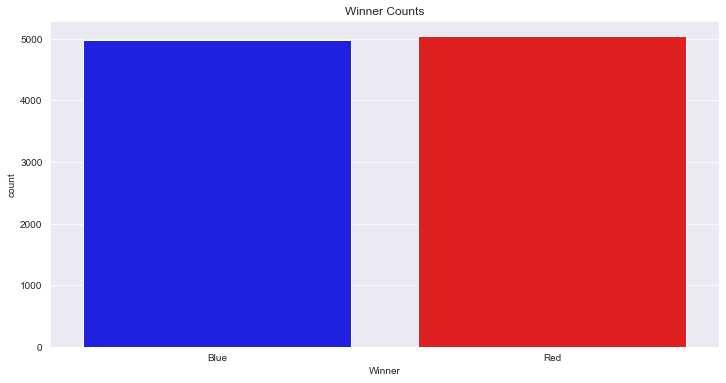

In [47]:
# Created a basic Bar Plot to show that the teams are evenly matched, 
#      with the Red team winning slightly more often than the Blue team.
    
plt.figure(figsize=(12, 6))
sns.countplot(x='Winner', data=LeagueDF, palette=['blue', 'red'])
plt.title('Winner Counts')
plt.show()

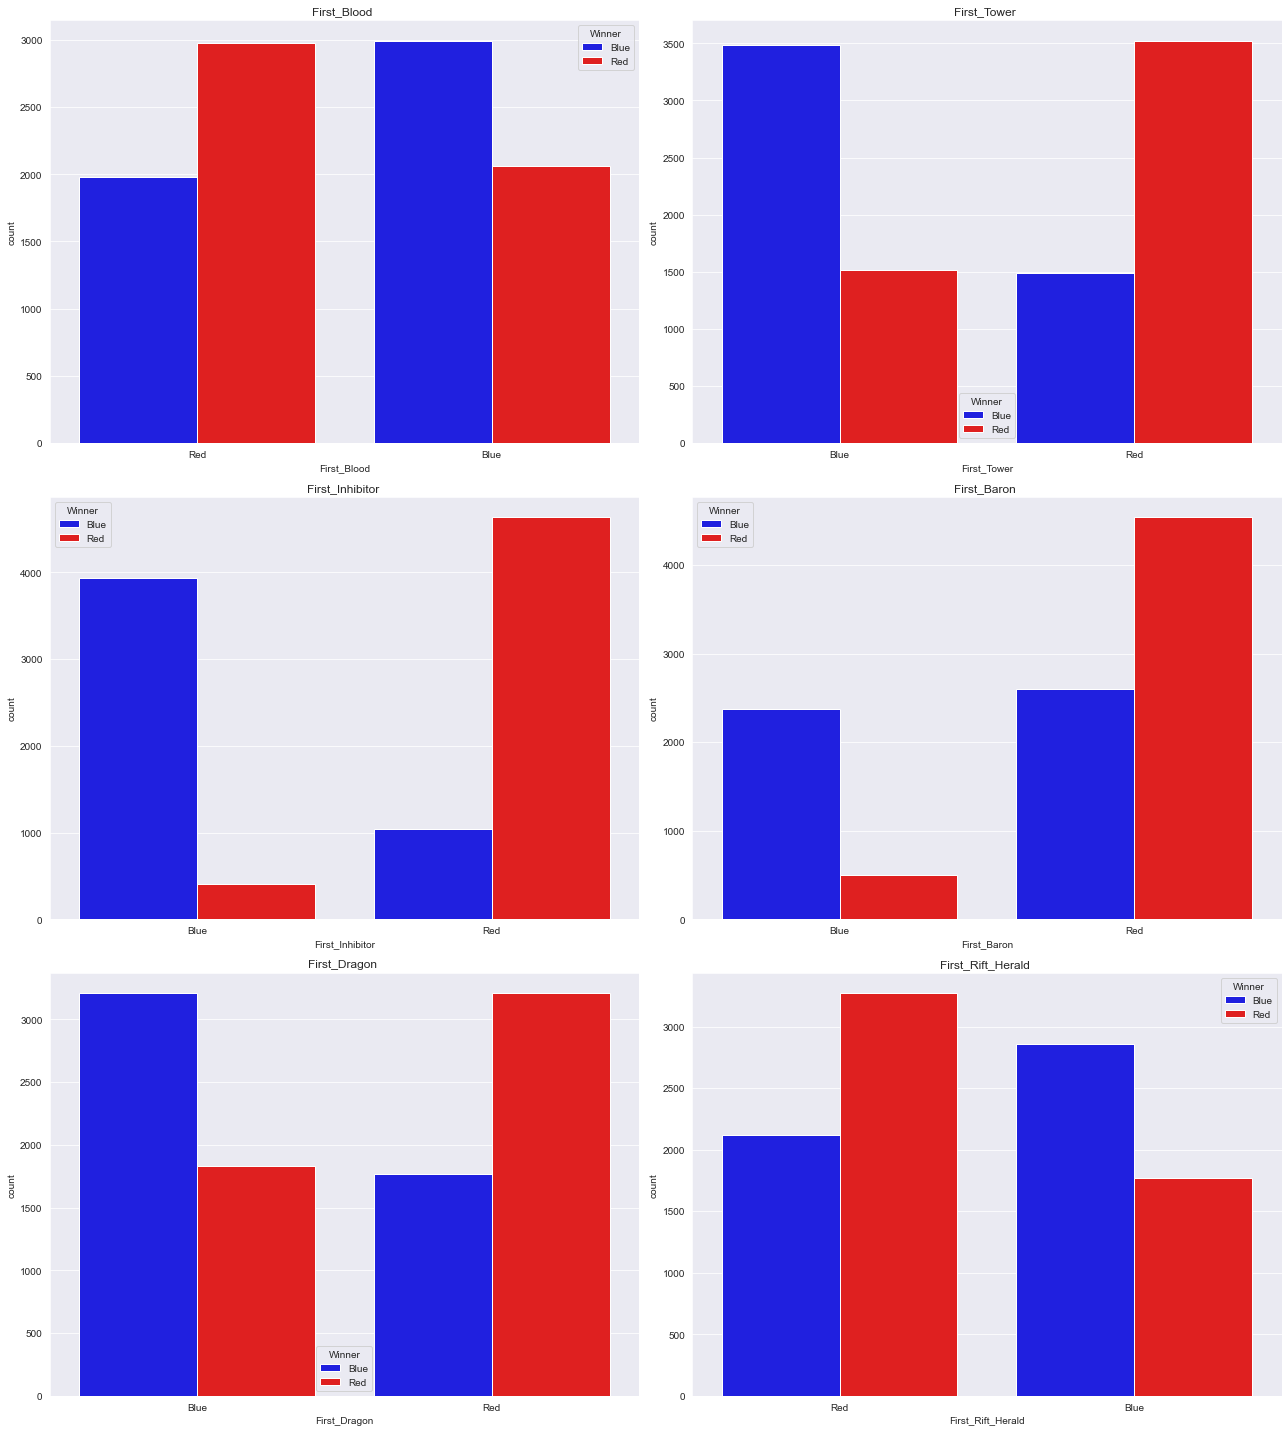

In [42]:
# Listed the categorical columns
cat_cols = ['First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron', 'First_Dragon', 'First_Rift_Herald']

# Created Count Plots for each categorical variable compared to the Winner
num_cols = 2
num_rows = (len(cat_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(18, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(x=col, hue='Winner', data=LeagueDF, palette=['blue', 'red'])
    plt.title(f'{col} ')
    plt.tight_layout()
plt.show()

### Findings: 
The count plots for each categorical variable compared to the game outcome ('Winner') in the dataset provide insights into how different game events correlate with winning:

__First Baron:__ The team that secures the first Baron tends to win the game more often. The strong correlation suggests that the Baron buff provides significant strategic advantages, including enhanced minion strength and improved combat stats, which could lead to more successful engagements and tower pushes.

__First Inhibitor:__ Teams capturing the first inhibitor generally have a higher chance of winning. An inhibitor's loss impacts lane pressure significantly, allowing super minions to spawn and forcing the opposing team to defend their base, thereby reducing their map control and objective-taking capabilities.

__First Tower:__ Securing the first tower seems to correlate well with winning, as it not only provides a gold advantage but also opens the map for further tactical plays and jungle control. Early tower loss for a team can signify a loss of control over key areas, impacting subsequent objectives like dragons or rift heralds.

__First Dragon:__ Teams that kill the first dragon usually have a higher win rate, although the impact appears to be less than that of the first Baron or first Inhibitor. Dragons provide team-wide buffs that enhance combat effectiveness and may contribute to snowballing advantages.

__First Rift Herald:__ The influence of the first Rift Herald is visible but not as decisive as the other objectives. While capturing the Rift Herald provides a strategic tool for pushing lanes, its impact is usually confined to early or mid-game scenarios and may depend on how effectively it's utilized to destroy structures.

__First Blood:__ Interestingly, the team that scores the first kill does not show a dominant advantage in terms of winning the match. This suggests that while an early kill can provide an initial advantage, it is not a strong predictor of overall match success compared to other objectives.

These plots underscore the importance of early game objectives in shaping the outcome of a match. Teams that focus on securing these key objectives often gain material advantages that translate into higher chances of victory.

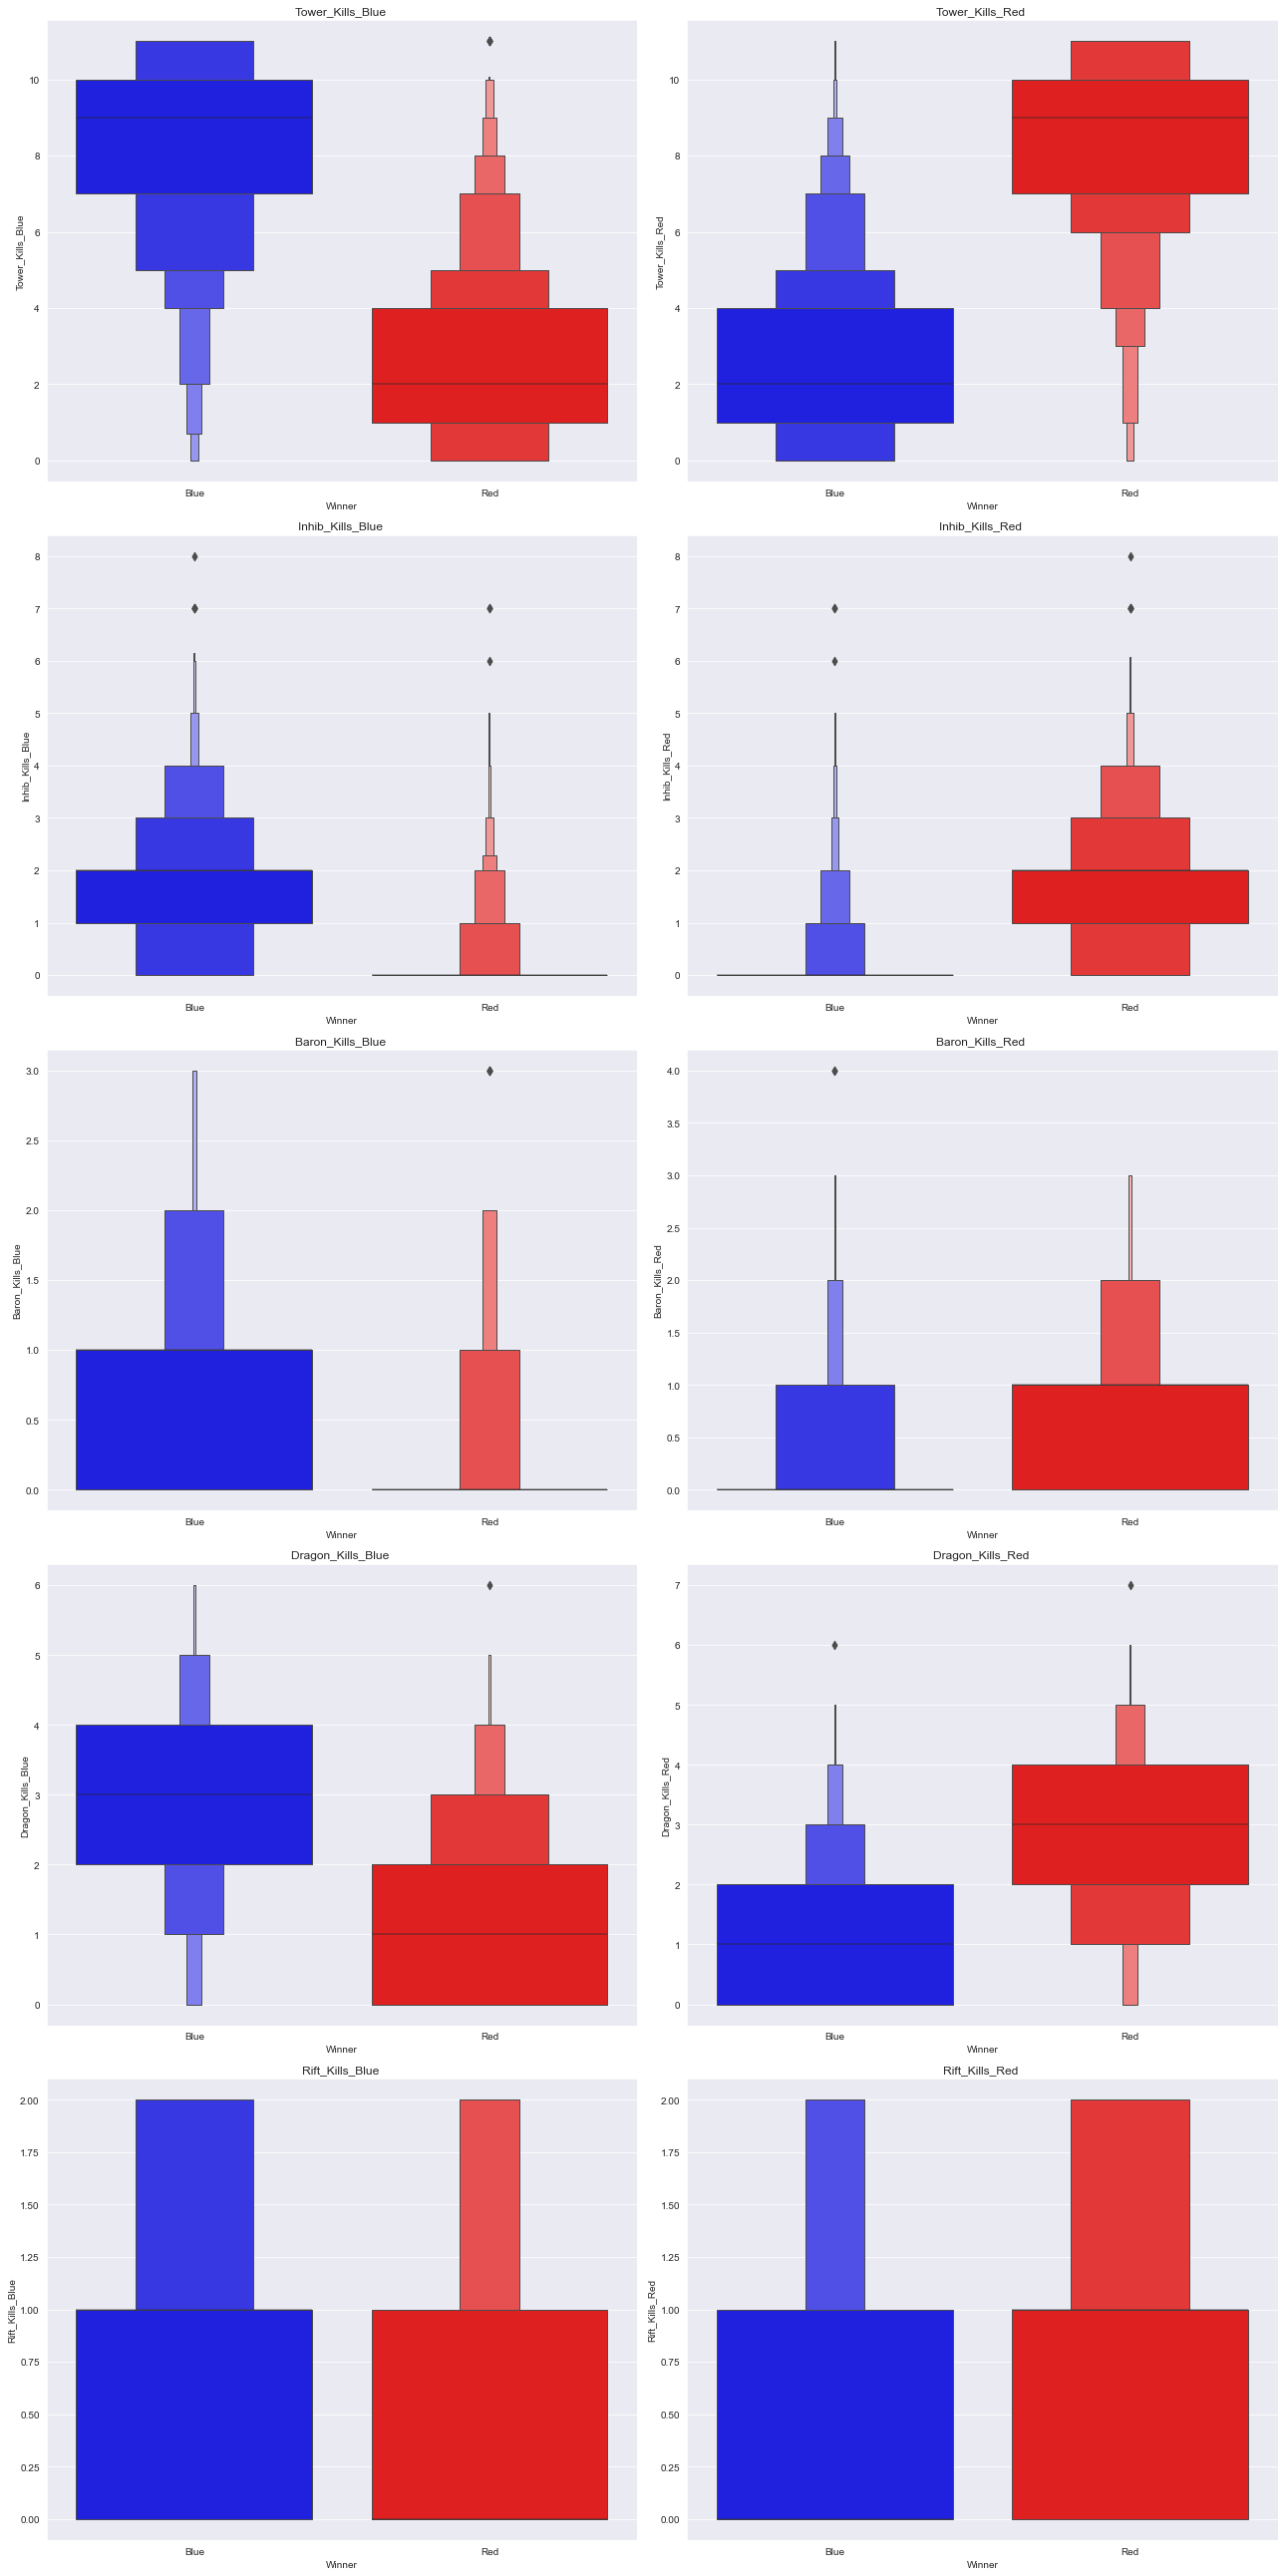

In [43]:
# List of Int64 columns
int64_cols = ['Tower_Kills_Blue', 'Tower_Kills_Red', 'Inhib_Kills_Blue', 'Inhib_Kills_Red', 
              'Baron_Kills_Blue', 'Baron_Kills_Red', 'Dragon_Kills_Blue', 'Dragon_Kills_Red', 
              'Rift_Kills_Blue',  'Rift_Kills_Red']

# Created Boxen Plots for each Int64 column
num_cols = 2
num_rows = (len(int64_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(18, 36))
for i, col in enumerate(int64_cols):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxenplot(x='Winner', y=col, data=LeagueDF, palette=['blue', 'red'])
    plt.title(f'{col} ')
    plt.tight_layout()
plt.show()

### Findings:
__Tower Kills:__ There is a distinct difference between the distributions for the winning and losing teams. Winners tend to destroy more towers, which is a strong indicator of map control and progression towards the enemy base.

__Inhibitor Kills:__ Similar to tower kills, the number of inhibitors destroyed is considerably higher for the winning team, underscoring the importance of inhibitors in gaining a strategic advantage and applying pressure across the map.

__Baron Kills:__ The boxen plot indicates that teams that secure more Baron kills generally have a higher chance of winning. Baron buffs significantly boost the team's ability to push lanes and secure objectives.

__Dragon Kills:__ Winning teams usually secure more dragons, suggesting that the buffs provided by dragons (such as increased damage or regeneration) play a crucial role in enhancing team performance and securing victories.

__Rift Herald Kills:__ The impact of Rift Heralds is visible, with winners more likely to have utilized this objective to push lanes effectively, though the overall impact appears slightly less pronounced compared to Barons or Dragons.

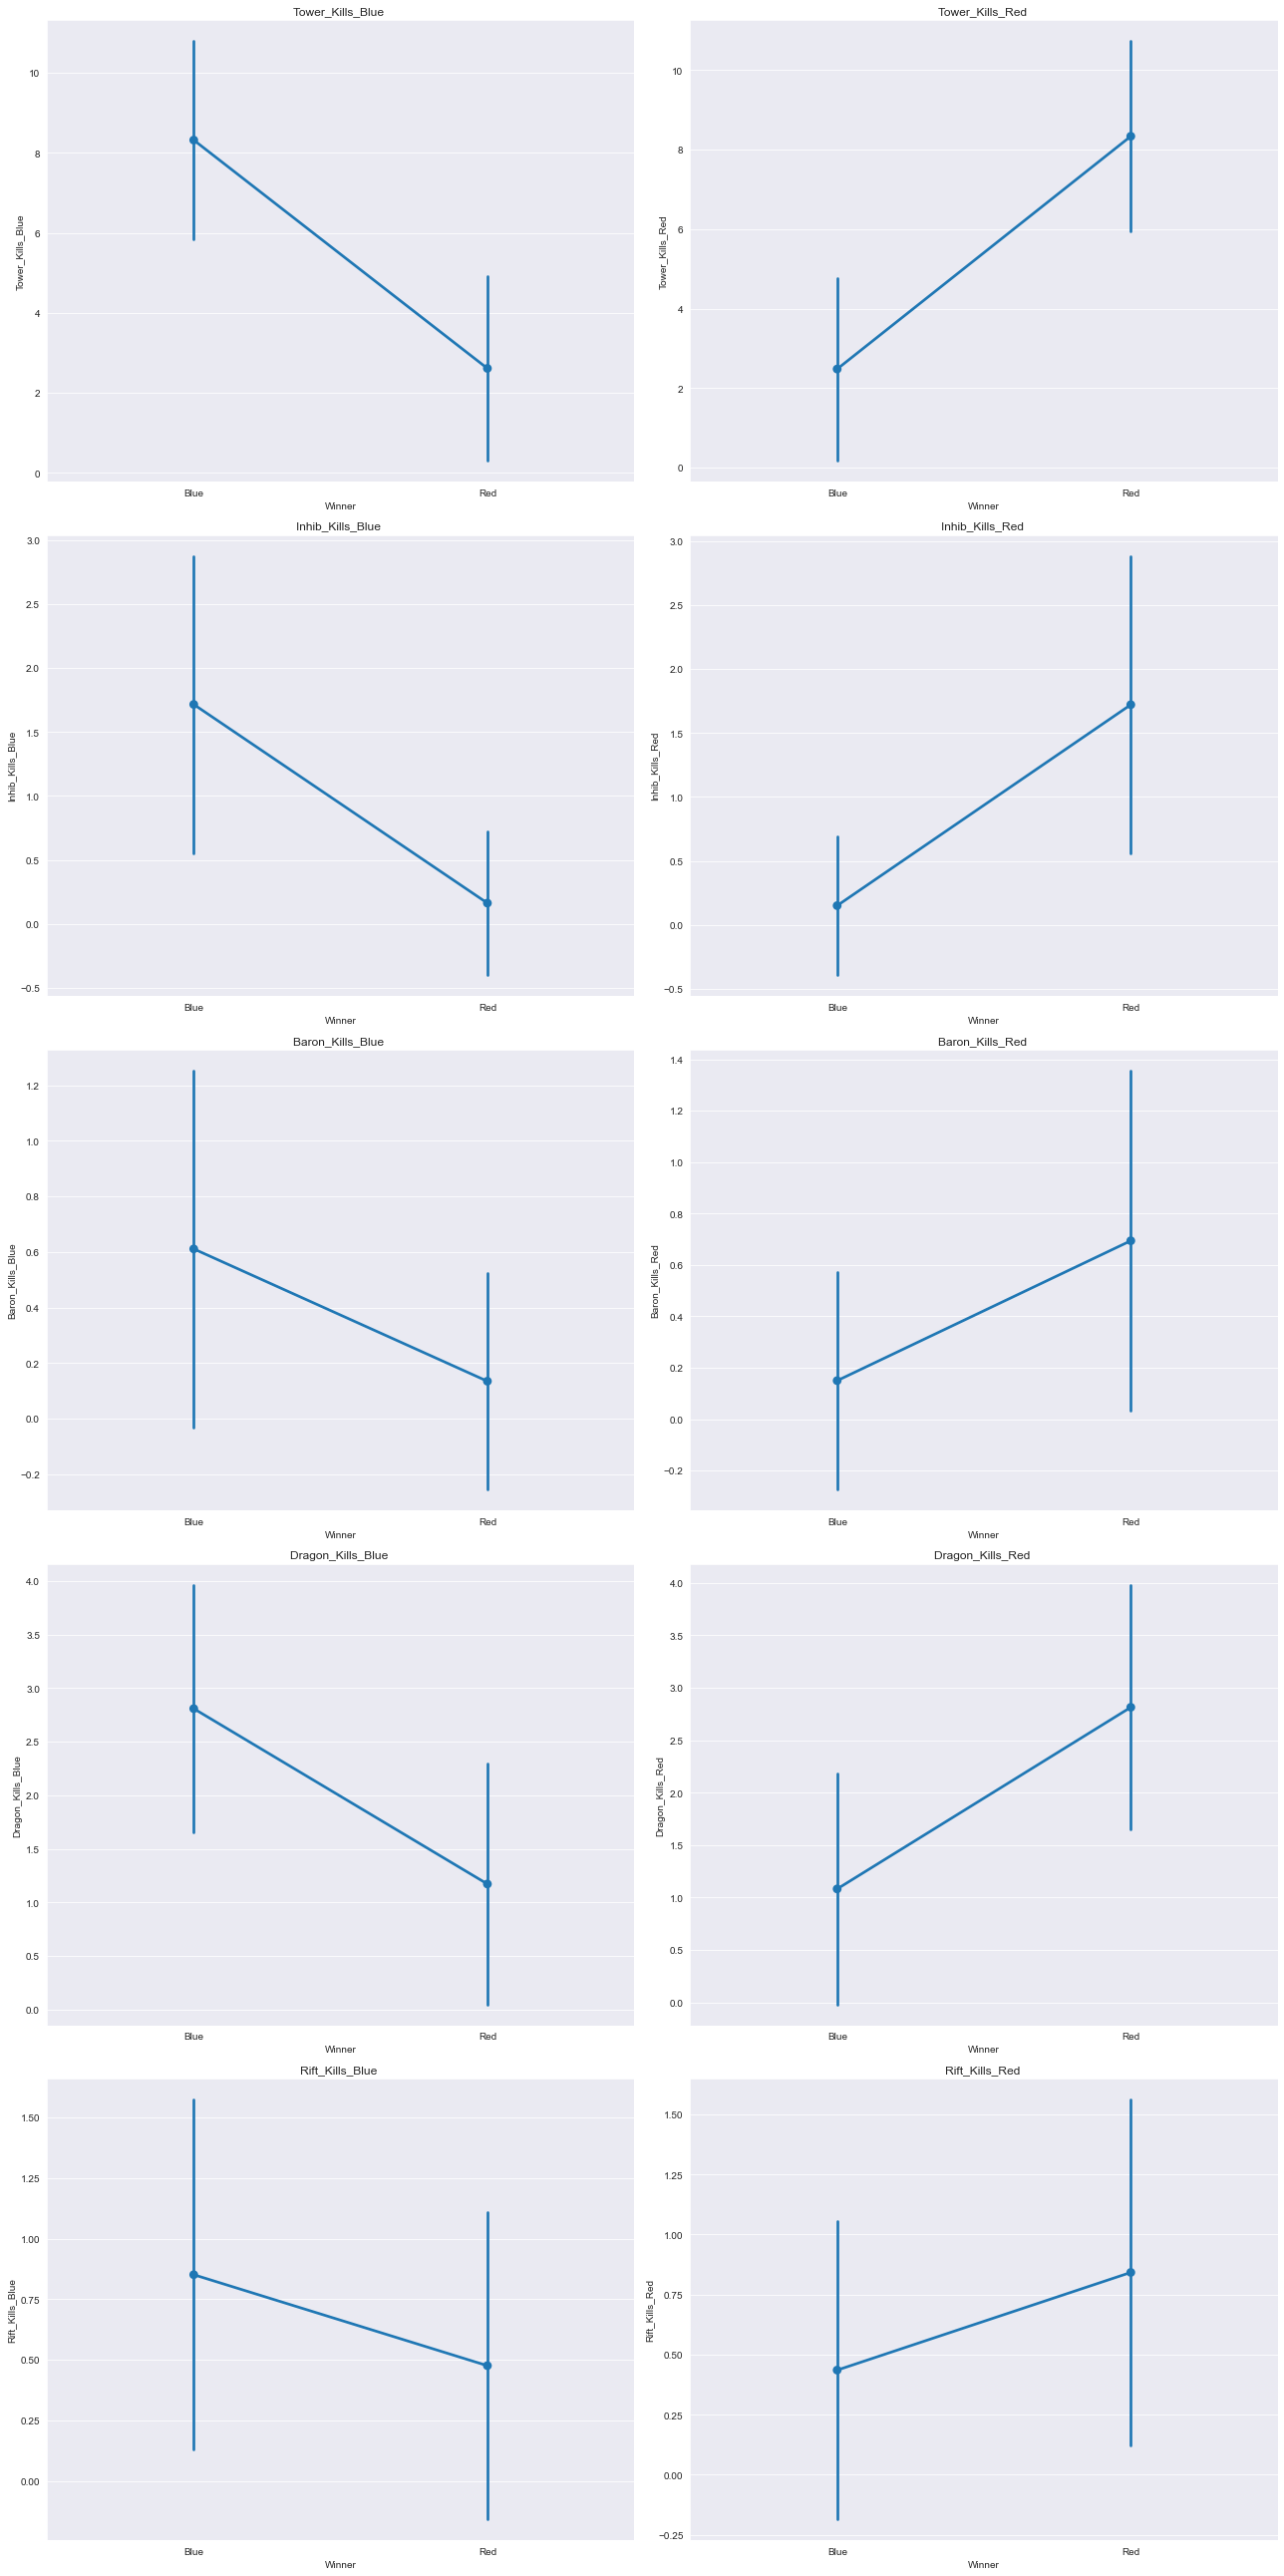

In [57]:
# Created Point Plots for each Int64 column
num_cols = 2
num_rows = (len(int64_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(18, 36))
for i, col in enumerate(int64_cols):
    plt.subplot(num_rows, num_cols, i+1)
    # Use ci='sd' for standard deviation
    sns.pointplot(x='Winner', y=col, data=LeagueDF, ci='sd')
    plt.title(f'{col} ')
    plt.tight_layout()
plt.show()

### FIndings:
__Trends:__ For all metrics (Tower Kills, Inhibitor Kills, Baron Kills, Dragon Kills, and Rift Herald Kills), the winning team generally has higher averages, demonstrating the importance of objective control.

__Standard Deviation:__ The plots include error bars representing standard deviation, which provides insights into the variability of each metric. Lower variability in certain metrics for winning teams could indicate consistent strategies that lead to winning.  
Shorter error bars imply that the outcomes are more predictable based on that metric, while longer error bars suggest more variability among the winning and losing teams.

__Strategic Analysis:__ These visualizations help underline which objectives are consistently associated with winning outcomes, such as higher tower and inhibitor kills, thereby suggesting focal points for strategic gameplay.